<h1 data-start="350" data-end="401">🐼 Pandas for Data Analysis</h1>

In [3]:
import pandas as pd

#### Notes
- Pandas → works with DataFrames (tables) and Series (columns)
- Works with mixed data types (numbers, text, dates, categories)
- Pandas → real-world datasets (with column names, mixed datatypes, missing values, cleaning + EDA)
- In Pandas → selection is by labels or numbers (df.loc[] / df.iloc[])

In [4]:
import numpy as np

<h2 data-start="462" data-end="505">1.📝Creating DataFrames &amp; Reading Data</h2>

<h3 style="color:#27ae60; margin:6px 0;">📁 1. Using Dictionary</h3>

- keys→ Column names
- Values → The corresponding row’s data(data inside those columns)(all the rows under that column).

In [5]:

df1=pd.DataFrame({"Name": ["A", "B", "C"], "Age": [23, 25, 30], "City": ["Delhi", "Mumbai", "Pune"]})
df1
#key=> as column names 
# values  => data inside those columns(rows under that column)

,Name,Age,City
0,A,23,Delhi
1,B,25,Mumbai
2,C,30,Pune


<h3 style="color:#27ae60; margin:6px 0;">📁 2. Using List</h3>

In [6]:
df2=pd.DataFrame([
    ["Amit", 25, "Data Analytics", 50000],
    ["Priya", 28, "Marketing", 55000],
    ["Rahul", 22, "Finance", 48000],
    ["Sneha", 30, "HR", 60000]
])
df2
#=> we're not providing column name implicitly => headers default (0,1,2..)

,0,1,2,3
0,Amit,25,Data Analytics,50000
1,Priya,28,Marketing,55000
2,Rahul,22,Finance,48000
3,Sneha,30,HR,60000


In [7]:
df3 = pd.DataFrame([["Carlos","Max"],["Williams","Red Bull"]], columns=["col1","col2"])
df3
#providing column name implicitly 
#✅Tip: each inner list=one row
#        number of items inside that list=number of columns

,col1,col2
0,Carlos,Max
1,Williams,Red Bull


In [8]:

# Sample list of lists 
data_list = [
    ["Amit", 25, "Data Analytics", 50000],
    ["Priya", 28, "Marketing", 55000],
    ["Rahul", 22, "Finance", 48000],
    ["Sneha", 30, "HR", 60000]
]
#4 inner list=4 rows
df4=pd.DataFrame(data_list)
df4

,0,1,2,3
0,Amit,25,Data Analytics,50000
1,Priya,28,Marketing,55000
2,Rahul,22,Finance,48000
3,Sneha,30,HR,60000


In [9]:
#adding column name manually
columns=["Name","Age","Department","Salary"]
df4=pd.DataFrame(data_list,columns=columns) #columns=> keyword argument
df4

,Name,Age,Department,Salary
0,Amit,25,Data Analytics,50000
1,Priya,28,Marketing,55000
2,Rahul,22,Finance,48000
3,Sneha,30,HR,60000


In [10]:
pd.DataFrame([["Carlos", "Sainz"] , ["Max", "Verstappen"]],
             columns=["First", "Last"])
#["Carlos", "Sainz"] => this is one row (horizontal)

,First,Last
0,Carlos,Sainz
1,Max,Verstappen


In [11]:
!pip install kagglehub --quiet
import kagglehub
import pandas as pd
import os

# Download Titanic dataset
path = kagglehub.dataset_download("amarnath1956/titanicdata-set")
print("Dataset downloaded to:", path)

# Find the CSV file
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)

# Load into pandas
if csv_file:
    df = pd.read_csv(csv_file)
    print("Dataset loaded successfully ✅")
    print(df.head())
else:
    print("CSV not found ❌")


Dataset downloaded to: C:\Users\Sakshi\.cache\kagglehub\datasets\amarnath1956\titanicdata-set\versions\1
CSV not found ❌


In [12]:
import kagglehub

path = kagglehub.dataset_download("amarnath1956/titanicdata-set")
print("Downloaded path:", path)


Downloaded path: C:\Users\Sakshi\.cache\kagglehub\datasets\amarnath1956\titanicdata-set\versions\1


In [13]:
import os

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


C:\Users\Sakshi\.cache\kagglehub\datasets\amarnath1956\titanicdata-set\versions\1\train csv.ipynb


<h2 style="color:#f59e0b; margin:6px 0;">⚡Loading Dataset via API from Kaggle</h2>

In [14]:
import kagglehub
import pandas as pd
import os

# Download Titanic competition dataset
path = kagglehub.competition_download("titanic")
print("Dataset downloaded to:", path)

# List all files in dataset
print("Files in dataset:")
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

# Load train.csv into Pandas
csv_file = os.path.join(path, "train.csv")
df = pd.read_csv(csv_file)

print("Dataset loaded successfully ✅")
print(df.head())


Dataset downloaded to: C:\Users\Sakshi\.cache\kagglehub\competitions\titanic
Files in dataset:
C:\Users\Sakshi\.cache\kagglehub\competitions\titanic\gender_submission.csv
C:\Users\Sakshi\.cache\kagglehub\competitions\titanic\test.csv
C:\Users\Sakshi\.cache\kagglehub\competitions\titanic\train.csv
Dataset loaded successfully ✅
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0    

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1️⃣ Quick Look

In [16]:
df.head() #first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.describe() # statistical summary for numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df.shape #rows,cols

(891, 12)

In [19]:
df.info() #datatypes +null counts 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.tail () # last 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [21]:
df.columns #list of columns/names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
df.index #row index-info

RangeIndex(start=0, stop=891, step=1)

In [23]:
df.sample(9) #9 sample rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S


 ## 2️⃣. 🔍 Selecting & Filtering

<h6 style="color:#a855f7; margin:6px 0;">📊 select columns</h6>

In [24]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [25]:
df[['Name','Age','Survived']] #multiple col

,Name,Age,Survived
0,"Braund, Mr. Owen Harris",22.0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,"Heikkinen, Miss. Laina",26.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,"Allen, Mr. William Henry",35.0,0
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,0
887,"Graham, Miss. Margaret Edith",19.0,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,0
889,"Behr, Mr. Karl Howell",26.0,1


<h6 style="color:#a855f7; margin:6px 0;">📊 selecting rows</h6>

In [26]:
df.iloc[0] #first row(by position)

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [27]:
df.iloc[0:5] #first 5 rows (slicing rows)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.loc[0] #by index table

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [29]:
df.loc[0:4 , ['Name' ,'Age']] #specific rows+colums
# [0:5 , ['col1 ,'col2']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


<h6 style="color:#a855f7; margin:6px 0;">📊 Conditional Selection</h6>

In [30]:
df[df["Age"]>25] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
df[(df["Age"]>30) & (df["Sex"]=="male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


## 3️⃣ Exploring Data

In [32]:
df['Sex'].value_counts() #frequency counts

Sex
male      577
female    314
Name: count, dtype: int64

In [33]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [34]:
df['Sex'].unique()  # unique values

array(['male', 'female'], dtype=object)

In [35]:
df['Sex'].nunique()    # number of unique values

2

In [36]:
df.isnull().sum() #missing values per column
                # by seeing o/p we've concluded that Age value has been missing mostly


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df.corr() #correlation b/w columns
          # gets error coz all columns ain't numeric

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
df.select_dtypes(include=['number']).corr()
#select_dtypes(include=['number']) selects only numeric columns (int, float).
#.corr() computes the correlation only on those numeric columns, avoiding errors from strings, objects, or NaNs.
#df.select_dtypes(include=['number']).corr().fillna(0)
#(if want to ignore NAN)


In [41]:
df.dtypes #to get colm types & perform mathm. operations 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
df['Age'].mean() #mean

np.float64(29.36158249158249)

In [43]:
df['Survived'].mean()

np.float64(0.3838383838383838)

In [44]:
df['Age'].median()

28.0

In [45]:
df['Age'].mode()

0    28.0
Name: Age, dtype: float64

In [46]:
df['Age'].min()

0.42

In [47]:
df['Age'].max()

80.0

In [48]:
df['Survived'].max()

1

## 4️⃣ Handling Missing Data

In [49]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<h6 style="color:#a855f7; margin:6px 0;">📊Fill missing</h6>

In [57]:
df["Age"]=df['Age'].fillna(df['Age'].median())

In [56]:
df.isnull().sum() #checks nulls , now age missing value got removed

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h6 style="color:#a855f7; margin:6px 0;">📊Drop missing</h6>

In [52]:
df['Age'].fillna(df['Age'].median(), inplace=True)
#because df['Age'] may be a view of the DataFrame, not the original DataFrame itself.
#Here, df['column_name'] may be a view/copy of the original DataFrame, so inplace=True is risky.

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_21152\4144066056.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [53]:
df["Age"]=df['Age'].fillna(df['Age'].median())

##### # Option 2: Use DataFrame-level fillna
```python
df.fillna({'Age': df['Age'].median()}, inplace=True)

In [60]:
df['Embarked']=df['Embarked'].fillna('S') #common for categorical

In [61]:
# Fill numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [62]:
df.isnull().sum() #now embarked got filled

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [69]:
df['Cabin'] = df['Cabin'].fillna('U') #'U' stands for “Unknown” or you can use 'Missing' as well.


<h4 style="color:#a855f7; margin:6px 0;">Missing Values got filled</h4>

In [70]:
df.isnull().sum() #cabin got filled

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin          0
dtype: int64

## 5️⃣ Data Cleaning / Transformation

<h6 style="color:#a855f7; margin:6px 0;">1.Rename Columns</h6>

In [73]:
df= df.rename(columns={'Sex':'Gender'})

<h6 style="color:#a855f7; margin:6px 0;">2.Change data type</h6>

In [74]:
df['Age']=df['Age'].astype(int)

<h6 style="color:#a855f7; margin:6px 0;">3.Strip Whitespaces</h6>

In [77]:
df['Name']=df['Name'].str.strip()

<h6 style="color:#a855f7; margin:6px 0;">4.Extract info</h6>

In [78]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

## 6️⃣ Sorting

In [80]:
df.sort_values('Age',ascending=True).head() 
#sort_values('Age') → sorts the DataFrame by the Age column.
#ascending=True → smallest age first (baby → adult).

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin,Title
831,832,1,2,"Richards, Master. George Sibley",male,0,1,1,29106,18.7500,U,S,S,Master
305,306,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,C22 C26,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0,0,2,248738,29.0000,U,S,S,Master
803,804,1,3,"Thomas, Master. Assad Alexander",male,0,0,1,2625,8.5167,U,C,S,Master
755,756,1,2,"Hamalainen, Master. Viljo",male,0,1,1,250649,14.5000,U,S,S,Master


In [83]:
df.sort_values(['Pclass','Age'],ascending =[True,False]).head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin,Title
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S,A23,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,A5,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,U,C,S,Mr
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71.0000,B22,S,B22,Capt
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65,0,1,113509,61.9792,B30,C,B30,Mr


In [ ]:
#Pclass ascending → 1 (first class) comes before 2, then 3.
#Age descending → within each Pclass, older passengers appear first.

## 7️⃣ Aggregation & Grouping

<h6 style="color:#a855f7; margin:6px 0;">Group-by</h6>

In [85]:
df.groupby('Gender')['Age'].mean() #avg age per gender

Gender
female    27.920382
male      30.121317
Name: Age, dtype: float64

In [86]:
df.groupby(['Pclass','Gender'])['Fare'].mean()

Pclass  Gender
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

 <h6 style="color:#a855f7; margin:6px 0;">Aggregate multiple stats</h6>


In [87]:
df.groupby('Pclass')['Fare'].agg(['min','max','mean','median'])

,min,max,mean,median
Pclass,,,,
1,0.0,512.3292,84.154687,60.2875
2,0.0,73.5000,20.662183,14.2500
3,0.0,69.5500,13.675550,8.0500


## 8️⃣ Applying Functions

 <h6 style="color:#a855f7; margin:6px 0;">Custom function</h6>

In [96]:
# Custom function
def age_category(age):
    if age < 18: 
        return 'Child'
    elif age < 60: 
        return 'Adult'
    else: 
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_category)



 <h6 style="color:#a855f7; margin:6px 0;">Lambda function</h6>

In [98]:
df['Fare2']=df ['Fare'].apply(lambda x:x*1.1)

## 9️⃣ Merging / Joining / Concatenating

 <h6 style="color:#a855f7; margin:6px 0;">Concatenation</h6>

In [102]:
df2=pd.DataFrame({'PassengerId':[892,893],'Survived':[0,1]})
pd.concat([df,df2],ignore_index=True)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin,Title,AgeGroup,Fare2
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,U,S,S,Mr,Adult,7.97500
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,C85,Mrs,Adult,78.41163
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,U,S,S,Miss,Adult,8.71750
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,C123,Mrs,Adult,58.41000
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,U,S,S,Mr,Adult,8.85500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2.0,W./C. 6607,23.4500,U,S,S,Miss,Adult,25.79500
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C,C148,Mr,Adult,33.00000
890,891,0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.7500,U,Q,S,Mr,Adult,8.52500
891,892,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 <h6 style="color:#a855f7; margin:6px 0;">Merging</h6>

In [103]:
df.merge(df2, on='PassengerId',how='left')

,PassengerId,Survived_x,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin,Title,AgeGroup,Fare2,Survived_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,U,S,S,Mr,Adult,7.97500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C85,Mrs,Adult,78.41163,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,U,S,S,Miss,Adult,8.71750,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C123,Mrs,Adult,58.41000,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,U,S,S,Mr,Adult,8.85500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,U,S,S,Rev,Adult,14.30000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,B42,Miss,Adult,33.00000,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,U,S,S,Miss,Adult,25.79500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,C148,Mr,Adult,33.00000,NaN


##   🔟 Pivot Table 




In [104]:
pd.pivot_table(df,index='Gender' , columns='Pclass',values='Fare',aggfunc='mean')

Pclass,1,2,3
Gender,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


✅ Parameters
- index='Gender' → Rows will be grouped by Gender (male, female).
- columns='Pclass' → Columns will be split by Passenger Class   (1, 2, 3).
- values='Fare' → We only care about the Fare column (ticket    price).
- aggfunc='mean' → Compute the average fare for each group.
- This creates a matrix table
- index= → becomes rows
- columns= → becomes columns
- values= → what you calculate
- aggfunc= → how you calculate (mean, sum, count…)


In [105]:
pd.pivot_table(df,index='Gender',columns='Pclass',values='PassengerId',aggfunc='count')
# count passenger

Pclass,1,2,3
Gender,,,
female,94,76,144
male,122,108,347


In [108]:
pd.pivot_table(df, index='Gender', columns='Pclass', values='Age', aggfunc='median')
#Median age by Sex & Pclass

Pclass,1,2,3
Gender,,,
female,32.5,28.0,28.0
male,36.0,29.0,28.0


## 1️⃣1️⃣ String Operations

In [110]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin ', 'Title',
       'AgeGroup', 'Fare2'],
      dtype='object')

In [112]:
df["Name"].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [114]:
df["Name"].str.contains('Smith')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [116]:
# df['Name'].str.replace('Mr.', 'Mister')
df['Name'].str.replace('Mister','Mr')

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

 ## 1️⃣2️⃣ Visualization with Pandas

In [117]:
import matplotlib.pyplot as plt

<h3 style="color:#f59e0b; margin:6px 0;">⚡Histogram</h3>

<Axes: >

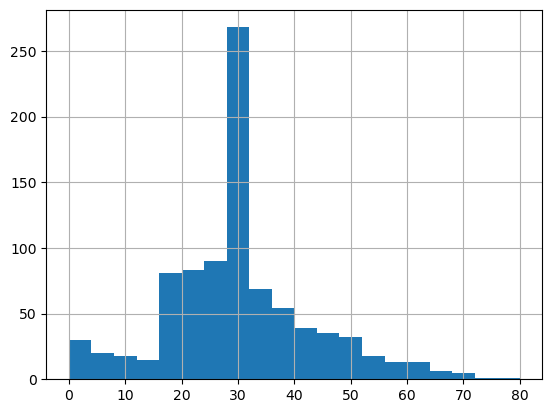

In [121]:
df['Age'].hist(bins=20)

<Axes: >

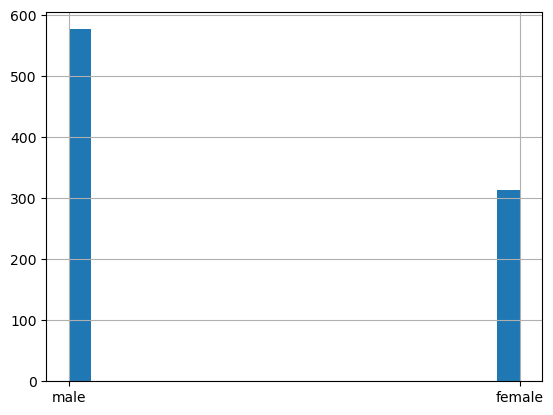

In [124]:
df['Gender'].hist(bins=20)

<h3 style="color:#f59e0b; margin:6px 0;">⚡Bar Chart</h3>

<Axes: xlabel='Pclass'>

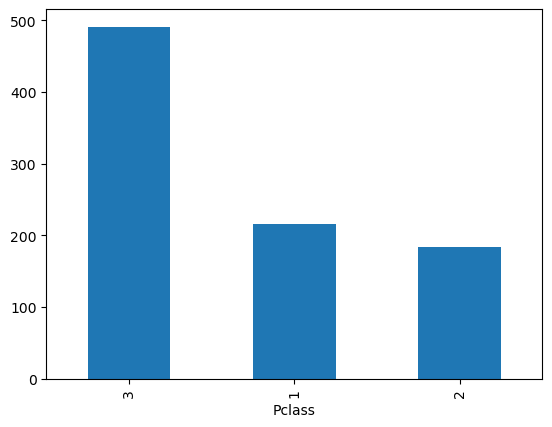

In [122]:
df['Pclass'].value_counts().plot(kind='bar')

<h3 style="color:#f59e0b; margin:6px 0;">⚡Boxplot</h3>

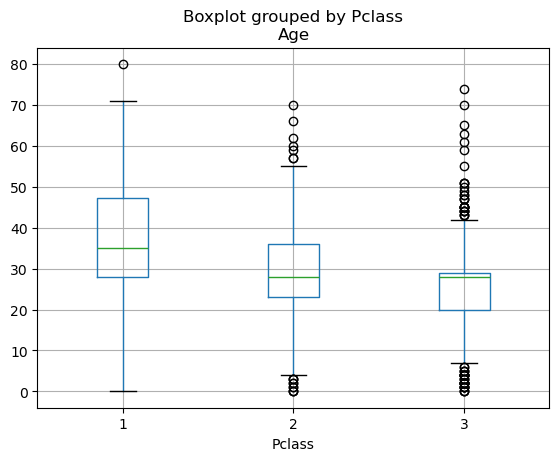

In [123]:
df.boxplot(column='Age',by='Pclass')
plt.show()

## 1️⃣3️⃣ Saving / Exporting Data

In [125]:
df.to_csv("titanic_clean.csv",index=False)

In [127]:
df.to_csv('C:/Users/Sakshi/Documents/titanic_data_cleaned.csv', index=False)